<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Seperate x, y and make dummy vatriables 

In [4]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No_phone', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaymentMethod_Bank_transfer',
       'PaymentMethod_Credit_card', 'PaymentMethod_Electronic_check',
       'Pa

In [5]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Female', 'MultipleLines_No_phone', 'InternetService_No', 'OnlineSecurity_No_internet',
         'OnlineBackup_No_internet', 'DeviceProtection_No_internet', 'TechSupport_No_internet', 
         'StreamingTV_No_internet', 'StreamingMovies_No_internet', 'Contract_One_year',
         'PaymentMethod_Bank_transfer'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month_to_month', 'Contract_Two_year',
       'PaymentMethod_Credit_card', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [6]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

## Baseline model

__which evaluation metric is most essential for this project ?__ <br>
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$

0 - not churned
1 - churned.
We want to predict churned (1) as accurately as possible. So, __FN__ is bad for us. Meaning model predict not churn but the customer actually churned. Then __recall__ is the important score for us. When evaluating between models we should pay more attention to recall and try to reduce FN as much as possible.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import plotly.graph_objs as go
import plotly.offline as py#visualization
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)#visualization

Using TensorFlow backend.


In [8]:
def results(model, X_1, X_train_1, y_train_1, X_test_1, y_test_1, cf, notfig):
    # fit model and get predictions 
    model.fit(X_train_1, y_train_1)
    #predictions
    prediction_train = model.predict(X_train_1)
    prediction_test = model.predict(X_test_1)
    
    print('-'*90)
    print(model)
    
    print('-'*90)
    print('Training accuracy Score:', accuracy_score(y_train_1, prediction_train))
    print('Model accuracy Score:', accuracy_score(y_test_1, prediction_test))

    print('-'*90)
    print('Classification Matrix:')
    print(classification_report(y_test_1, prediction_test))    
    
    print('-'*90)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test_1, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    conf_matrix = confusion_matrix(y_test_1, prediction_test)
    z=[list(conf_matrix[i]) for i in [1,0]]
    x = ["not Churn", "churn"]
    y = ["Churn", "not churn"]
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]
    # set up figure 
    fig1 = ff.create_annotated_heatmap(z, x=["not Churn", "churn"], y=["Churn", "not churn"],
                                      annotation_text=z_text, colorscale='Viridis')
    fig1.update_layout( autosize=False, width=350, height=350,
        yaxis=dict( title_text="Actual", tickmode="array", titlefont=dict(size=21)),
        xaxis=dict(title_text="Predics", tickmode="array", titlefont=dict(size=21)),
        )
    fig1.show()    

    #roc_auc_score
    if notfig != 'fig2':
        # 
        y_score_test = model.decision_function(X_test_1)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test_1, y_score_test)
        test_model_roc_auc = roc_auc_score(y_test_1,y_score_test) 

        y_score_train = model.decision_function(X_train_1)
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train_1, y_score_train)
        train_model_roc_auc = roc_auc_score(y_train_1,y_score_train) 

        #plot roc curve          #rgb(31, 119, 180)   #rgb(22, 96, 167)
        trace1 = go.Scatter(x = train_fpr,y = train_tpr,
                            name = "Train_Roc : " + str(train_model_roc_auc),
                            line = dict(color = ('blue'),width = 2))
        trace2 = go.Scatter(x = test_fpr,y = test_tpr,
                            name = "test_Roc : " + str(test_model_roc_auc),
                            line = dict(color = ('orange'),width = 2))
        trace3 = go.Scatter(x = [0,1],y=[0,1],
                            line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                            dash = 'dot'))
        data2 = [trace1,trace2,trace3]
        fig2 = go.Figure(data=data2)
        fig2.update_layout( autosize=False, width=700, height=500, title='Receiver operating characteristic',
            yaxis=dict(title_text="True positive rate"),
            xaxis=dict(title_text="False positive rate"),
            )
        fig2.show()

    #best coefficients and important features
    if notfig != 'fig3':
        #
        if   cf == "coefficients" :
            coefficients  = pd.DataFrame(model.coef_.ravel())
        elif cf == "features" :
            coefficients  = pd.DataFrame(model.feature_importances_)

        cols    = [i for i in X_1.columns]
        column_df     = pd.DataFrame(cols)
        coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                                  right_index= True, how = "left"))
        coef_sumry.columns = ["coefficients","features"]
        coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
        trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6,color = "black")))
        data = [trace4]
        fig3  = go.Figure(data=data)
        fig3.update_layout(title_text='important '+cf)
        #fig.update_xaxes(tickangle=45)
        fig3.show()

In [9]:
#model_performances
def output_tracer(model_performances, metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer
def plot_tracers(model_performances):
    layout = go.Layout(dict(title = "Model performances",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "metric",
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            margin = dict(l = 250),
                            height = 780
                           )
                      )


    trace1  = output_tracer(model_performances, "Accuracy_score","#6699FF")
    trace2  = output_tracer(model_performances, 'Recall_score',"red")
    trace3  = output_tracer(model_performances, 'Precision',"#33CC99")
    trace4  = output_tracer(model_performances, 'f1_score',"lightgrey")

    data = [trace1,trace2,trace3,trace4]
    fig = go.Figure(data=data,layout=layout)
    fig.show()


In [10]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 

    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df


In [11]:
# make a test-train split
split_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=42) #stratify=y

In [12]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (3516, 30)(3516,)
Test dataset: (3516, 30)(3516,)


In [13]:
#scale features 
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
# Let's create a baseline model for all models. Let's statr with as minimum amount of parameters as possible 

# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train,X_test,y_train,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train,X_test,y_train,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train,X_test,y_train,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model4 = model_report(rfc,X_train,X_test,y_train,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model5 = model_report(svc,X_train,X_test,y_train,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model6 = model_report(xgc,X_train,X_test,y_train,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.802901,0.539278,0.662321,0.594500,0.719328
1,Decision Tree,0.727531,0.487261,0.491435,0.489339,0.651362
2,KNN Classifier,0.757964,0.523355,0.550838,0.536745,0.683589
3,Random Forest Classifier,0.782139,0.473461,0.622905,0.537998,0.684283
4,SVM Classifier Linear,0.802617,0.535032,0.663158,0.592244,0.717788
5,XGBoost Classifier,0.797782,0.514862,0.656292,0.577037,0.708091


### Improving model with SMOTE

In [15]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_smote).value_counts())

1    2589
0    2589
dtype: int64


In [16]:
# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train_smote,X_test,y_train_smote,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model4 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model5 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model6 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.754551,0.791932,0.527955,0.633546,0.766401
1,Decision Tree,0.723834,0.548832,0.486359,0.515711,0.668356
2,KNN Classifier,0.695392,0.675159,0.453961,0.542894,0.688978
3,Random Forest Classifier,0.777588,0.545648,0.592166,0.567956,0.704059
4,SVM Classifier Linear,0.699090,0.831210,0.465517,0.596799,0.740974
5,XGBoost Classifier,0.789534,0.675159,0.594393,0.632207,0.753275


with SMOTE we can see that the model accuray score reduces a little but the __recall__ improves considerablly. As recall is the main evaluation metric of interest for churn dataset it is better to use SMOTE. 
From the evaluation comparison above clearly Logistic regression and SVM classifiers give the best performance and worth exploring further. However, since XGboots is been known to perform well with the correct set of hyper parameters let's explot XGboost further as well. 

## Improving model accuracy 

In [17]:
def get_pl(name, classifier, parms, score='recall'):
    # function
    pl = Pipeline([(name, classifier)])

    gs = GridSearchCV(pl, parms, scoring=score, cv=5, n_jobs=-1)

    gs.fit(X_train_smote, y_train_smote)

    best_parameters = gs.best_params_
    print("Grid Search found the following optimal parameters: ")
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

    if score == 'accuracy':
        # optimize for accuracy
        training_preds = gs.predict(X_train_smote)
        val_preds = gs.predict(X_test)
        training_accuracy = accuracy_score(y_train_smote, training_preds)
        val_accuracy = accuracy_score(y_test, val_preds)

        print("")
        print("Training accuracy : {:.4}%".format(training_accuracy * 100))
        print("Validation accuracy: {:.4}%".format(val_accuracy * 100))
    elif score == 'recall':
        # optimize for recall
        training_preds = gs.predict(X_train_smote)
        val_preds = gs.predict(X_test)
        training_recall = recall_score(y_train_smote, training_preds)
        val_recall = recall_score(y_test, val_preds)

        print("")
        print("Training recall: {:.4}%".format(training_recall * 100))
        print("Validation recall: {:.4}%".format(val_recall * 100))
    return None

### Logistic Regression

Following parameters maybe set and changed to get better accuracy 

* "penalty": 'l2' => Churn dataset have lot of multicoliniarity
* 'C': [100, 10, 1, 0.1, 0.01, 0.001]  => have to test strenth of regularization is best
* 'fit_intercept': True, False
* 'random_state': [11],
* 'solver': 'liblinear',
* 'max_iter': [200]


In [18]:
# call function 
param_grid = {    
    "logit__penalty": ['l2'],
    'logit__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logit__fit_intercept': [True, False],
    'logit__random_state': [11],
    'logit__solver': ['liblinear'],
    'logit__max_iter': [200],
}

#get_pl('logit', LogisticRegression(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
logit__C: 1
logit__fit_intercept: False
logit__max_iter: 200
logit__penalty: 'l2'
logit__random_state: 11
logit__solver: 'liblinear'

Training recall: 91.27%
Validation recall: 87.47%
"""

"\nGrid Search found the following optimal parameters: \nlogit__C: 1\nlogit__fit_intercept: False\nlogit__max_iter: 200\nlogit__penalty: 'l2'\nlogit__random_state: 11\nlogit__solver: 'liblinear'\n\nTraining recall: 91.27%\nValidation recall: 87.47%\n"

In [19]:
# after Gridsearch with recall for scoring
logreg_1 = LogisticRegression(C=1, fit_intercept= False, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
# model results
results(logreg_1, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', None)

------------------------------------------------------------------------------------------
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=11, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.764967168791039
Model accuracy Score: 0.6888509670079636
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      2574
           1       0.46      0.87      0.60       942

    accuracy                           0.69      3516
   macro avg       0.69      0.75      0.67      3516
weighted avg       0.

In [20]:
# call function 
param_grid = {    
    "logit__penalty": ['l2'],
    'logit__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logit__fit_intercept': [True, False],
    'logit__random_state': [11],
    'logit__solver': ['liblinear'],
    'logit__max_iter': [200],
}

#get_pl('logit', LogisticRegression(), param_grid, 'accuracy')

"""
Grid Search found the following optimal parameters: 
logit__C: 1
logit__fit_intercept: True
logit__max_iter: 200
logit__penalty: 'l2'
logit__random_state: 11
logit__solver: 'liblinear'

Training accuracy : 77.89%
Validation accuracy: 75.74%
"""

"\nGrid Search found the following optimal parameters: \nlogit__C: 1\nlogit__fit_intercept: True\nlogit__max_iter: 200\nlogit__penalty: 'l2'\nlogit__random_state: 11\nlogit__solver: 'liblinear'\n\nTraining accuracy : 77.89%\nValidation accuracy: 75.74%\n"

In [21]:
# after Gridsearch with recall for scoring
logreg_1 = LogisticRegression(C=1, fit_intercept= True, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
# model results
results(logreg_1, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', None)

------------------------------------------------------------------------------------------
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=11, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7811896485129394
Model accuracy Score: 0.7545506257110353
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2574
           1       0.53      0.79      0.63       942

    accuracy                           0.75      3516
   macro avg       0.72      0.77      0.72      3516
weighted avg       0.

### SVM

Following parameters maybe set and changed to get better accuracy 

* kernal: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
* C:  [100, 10, 1, 0.1, 0.01, 0.001] => how soft is the soft margin. low C means errors matter less
* degree: [2, 3] => highest order of poly kernal. ignored for other kernals 
* 'tol': [1e-4] => stopping criterion increased a little here



In [22]:
# Pipeline par grid for SVC
param_grid = {    
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'svm__C': [100, 0.1, 0.01, 0.001],
    'svm__degree': [2, 3],
    'svm__tol': [1e-4],
    'svm__gamma': ['auto'],
}

#get_pl('svm', SVC(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
svm__C: 0.001
svm__degree: 3
svm__gamma: 'auto'
svm__kernel: 'poly'
svm__tol: 0.0001

Training recall: 98.8%
Validation recall: 98.2%
"""

"\nGrid Search found the following optimal parameters: \nsvm__C: 0.001\nsvm__degree: 3\nsvm__gamma: 'auto'\nsvm__kernel: 'poly'\nsvm__tol: 0.0001\n\nTraining recall: 98.8%\nValidation recall: 98.2%\n"

In [23]:
# accuracy matric of the best set of parameters   kernel ='rbf', C=100, degree= 2,  tol = 0.0001, gamma = 'auto'
clf_svm_1 = SVC(kernel ='poly', C=0.001, degree= 3,  tol = 0.0001, gamma = 'auto')

results(clf_svm_1, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', 'fig3')

------------------------------------------------------------------------------------------
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.589416763229046
Model accuracy Score: 0.4021615472127418
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.96      0.19      0.32      2574
           1       0.31      0.98      0.47       942

    accuracy                           0.40      3516
   macro avg       0.64      0.59      0.39      3516
weighted avg       0.79      0.40      0.36      3516

----------------------------------------------------------

In [24]:
# Pipeline par grid for SVC
param_grid = {    
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'svm__C': [100, 0.1, 0.01, 0.001],
    'svm__degree': [2, 3],
    'svm__tol': [1e-4],
    'svm__gamma': ['auto'],
}

#get_pl('svm', SVC(), param_grid, 'accuracy')
"""
Grid Search found the following optimal parameters: 
svm__C: 100
svm__degree: 2
svm__gamma: 'auto'
svm__kernel: 'rbf'
svm__tol: 0.0001

Training accuracy : 96.1%
Validation accuracy: 73.15%
"""

"\nGrid Search found the following optimal parameters: \nsvm__C: 100\nsvm__degree: 2\nsvm__gamma: 'auto'\nsvm__kernel: 'rbf'\nsvm__tol: 0.0001\n\nTraining accuracy : 96.1%\nValidation accuracy: 73.15%\n"

In [25]:
# accuracy matric of the best set of parameters  
clf_svm_1 = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')

results(clf_svm_1, X, X_train_smote, y_train_smote, X_test, y_test,'coefficients', 'fig3')

------------------------------------------------------------------------------------------
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7734646581691773
Model accuracy Score: 0.7502844141069397
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      2574
           1       0.52      0.78      0.63       942

    accuracy                           0.75      3516
   macro avg       0.71      0.76      0.72      3516
weighted avg       0.80      0.75      0.76      3516

-----------------------------------------------------------

In [26]:
# accuracy matric of the best set of parameters  
clf_svm_1 = SVC(kernel ='linear', C=0.001, tol = 0.0001, gamma = 'auto')

results(clf_svm_1, X, X_train_smote, y_train_smote, X_test, y_test,'coefficients', 'fig3')

------------------------------------------------------------------------------------------
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7668984163769795
Model accuracy Score: 0.7383390216154722
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2574
           1       0.51      0.81      0.62       942

    accuracy                           0.74      3516
   macro avg       0.71      0.76      0.71      3516
weighted avg       0.80      0.74      0.75      3516

-------------------------------------------------------

### XGBoost
parameters: 
* learning_rate: must be set to 1 when training random forest regression. controls the contribution of estimators in the final combination. 
* max_depth:  depth of a given tree 
* min_child_weight': Minimum sum of instance weight needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.
* subsample: Subsample ratio of the training instances.                 
* n_estimator: The number of trees in the forrest.

In [27]:
param_grid = {    
    'xgb__eta': [1],
    'xgb__max_depth': [3, 9, 12],
    'xgb__min_child_weight': [10, 18],
    'xgb__subsample': [0.3, 0.9],
    'xgb__n_estimators': [5, 30, 100, 250],
}

#get_pl('xgb', XGBClassifier(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
xgb__eta: 1
xgb__max_depth: 3
xgb__min_child_weight: 18
xgb__n_estimators: 5
xgb__subsample: 0.3

Training recall: 87.64%
Validation recall: 81.63%
"""

'\nGrid Search found the following optimal parameters: \nxgb__eta: 1\nxgb__max_depth: 3\nxgb__min_child_weight: 18\nxgb__n_estimators: 5\nxgb__subsample: 0.3\n\nTraining recall: 87.64%\nValidation recall: 81.63%\n'

In [28]:
# Create XBoost classifer object
clf_xgb = XGBClassifier(eta=1, max_depth=3,min_child_weight=18,n_estimators=5,subsample= 0.3)
results(clf_xgb, X, X_train_smote, y_train_smote, X_test, y_test, 'features', 'fig2')

# Plot features importances
#imp = pd.Series(data=clf_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
#plt.figure(figsize=(10,12))
#plt.title("Feature importance")
#ax = sns.barplot(y=imp.index, x=imp.values,palette="coolwarm", orient='h')

------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=18, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7825415218230978
Model accuracy Score: 0.7158703071672355
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2574
           1       0.48      0.8

### Random Forrest

parameters: 
* criterion':  loss function. gini  entropy
* n_estimator: The number of trees in the forrest.
* max_depth:  depth of a given tree 
* max_features: every split takes only subset of features. Thus, this will pick how many number of features 
               are tacken at every split [auto, none, sqrt, log2, 0.9....etc]
* min_samples_leaf: The minimum number of samples in newly created tree. 
* oob_score: out of bag score improves accuracy. 

In [29]:
# Pipeline par grid for Random Forrest
param_grid = {    
    'rf__criterion': ['gini','entropy'],
    'rf__max_depth': [5, 9, 15, 20],
    'rf__max_features':['auto', 0.9, 0.5],
    'rf__min_samples_split': [5,20,50],
    'rf__min_samples_leaf': [3, 5, 10],
    'rf__n_estimators': [1,5,10]
}

#get_pl('rf', RandomForestClassifier(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
rf__criterion: 'gini'
rf__max_depth: 5
rf__max_features: 0.9
rf__min_samples_leaf: 5
rf__min_samples_split: 5
rf__n_estimators: 10

Training recall: 86.94%
Validation recall: 78.34%
"""

"\nGrid Search found the following optimal parameters: \nrf__criterion: 'gini'\nrf__max_depth: 5\nrf__max_features: 0.9\nrf__min_samples_leaf: 5\nrf__min_samples_split: 5\nrf__n_estimators: 10\n\nTraining recall: 86.94%\nValidation recall: 78.34%\n"

In [30]:
# let's try the best random forrest 
clf_rf = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
#clf_rf = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
#                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
results(clf_rf, X, X_train_smote, y_train_smote, X_test, y_test, 'features', 'fig2')

------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.8271533410583237
Model accuracy Score: 0.7573947667804323
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2574
           1       0.53    

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



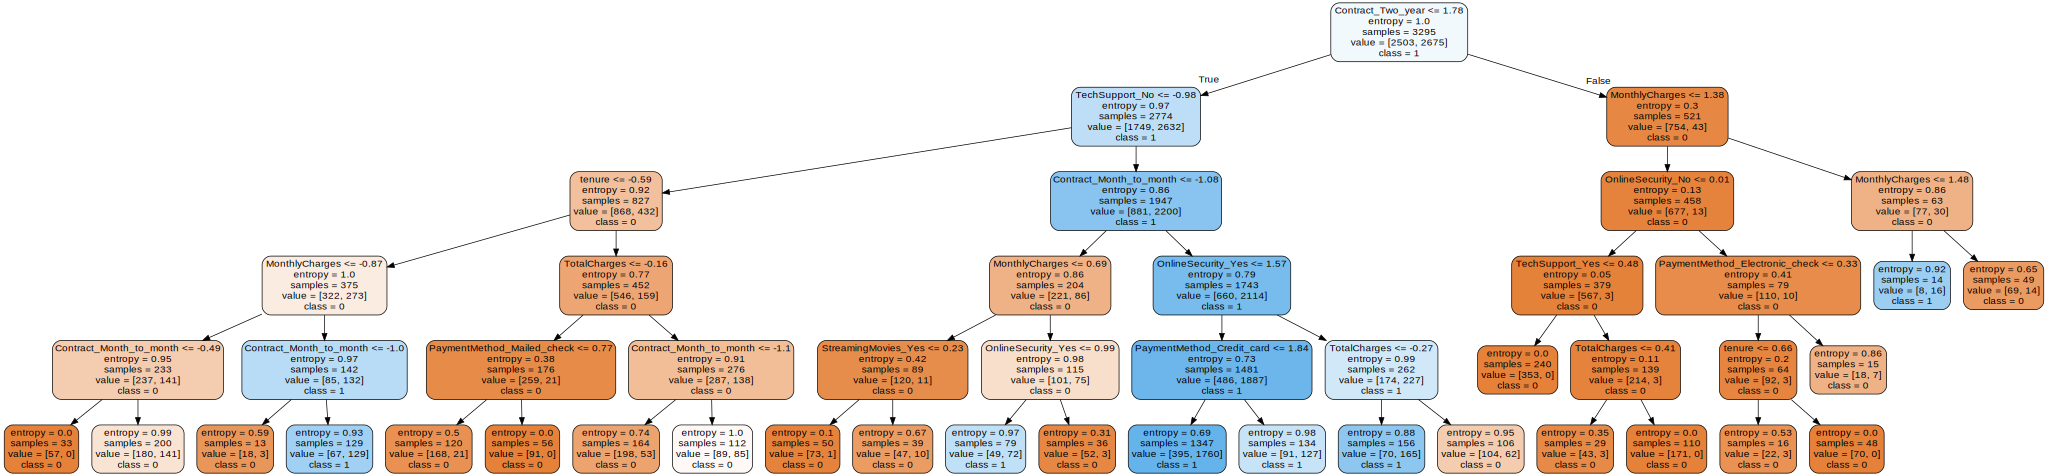

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
from IPython.display import SVG,display
from graphviz import Source

clf_rf = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
clf_rf.fit(X_train_smote, y_train_smote)
estimated_tree = clf_rf.estimators_[9]
graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                    rounded=True,proportion = False,
                        feature_names = X.columns, 
                        precision  = 2,
                        class_names=["0","1"],
                        filled = True))
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('img/rf.png')
#Image(graph.create_png())
display(graph)

### Neural Networks
Just as a test tried out sklearns MPL Classifier

In [32]:
# let's try the  NN
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='lbfgs', alpha=100, shuffle=True,
                       hidden_layer_sizes=(5,), random_state=1)

#results(clf_NN, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', 'fig2')

# fit model and get predictions 
clf_NN.fit(X_train_smote, y_train_smote)
#predictions
prediction_train = clf_NN.predict(X_train_smote)
prediction_test = clf_NN.predict(X_test)

print('-'*90)
print(clf_NN)

print('-'*90)
print('Training accuracy Score:', accuracy_score(y_train_smote, prediction_train))
print('Model accuracy Score:', accuracy_score(y_test, prediction_test))

print('-'*90)
print('Classification Matrix:')
print(classification_report(y_test, prediction_test))    

print('-'*90)
#print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
conf_matrix = confusion_matrix(y_test, prediction_test)
z=[list(conf_matrix[i]) for i in [1,0]]
x = ["not Churn", "churn"]
y = ["Churn", "not churn"]
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]
# set up figure 
fig1 = ff.create_annotated_heatmap(z, x=["not Churn", "churn"], y=["Churn", "not churn"],
                                  annotation_text=z_text, colorscale='Viridis')
fig1.update_layout( autosize=False, width=350, height=350,
    yaxis=dict( title_text="Actual", tickmode="array", titlefont=dict(size=21)),
    xaxis=dict(title_text="Predics", tickmode="array", titlefont=dict(size=21)),
    )
fig1.show()    

------------------------------------------------------------------------------------------
MLPClassifier(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7833140208574739
Model accuracy Score: 0.7565415244596132
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2574
           1       0

## model comparison after parameter optimization

In [33]:
name = "Logistic Regression"
#logit = LogisticRegression(C=10, fit_intercept= False, max_iter= 200, penalty= 'l2', 
#                              random_state= 11, solver= 'liblinear')
logit = LogisticRegression(C=1, fit_intercept= True, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
#rfc = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
#                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
model2 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
model3 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
#xgc = XGBClassifier(learning_rate=1, max_depth=3,min_child_weight=10,n_estimators=5,subsample= 0.3)
xgc = XGBClassifier(eta=1, max_depth=3,min_child_weight=18,n_estimators=5,subsample= 0.3)
model4 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "neural_network MLPClassifier"
clf_NN = MLPClassifier(solver='lbfgs', alpha=100, shuffle=True,
                       hidden_layer_sizes=(5,), random_state=1)
model5 = model_report(clf_NN,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4, model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.754551,0.791932,0.527955,0.633546,0.766401
1,Random Forest Classifier,0.756826,0.768577,0.531962,0.628745,0.760551
2,SVM Classifier Linear,0.750284,0.780255,0.522760,0.626065,0.759786
3,XGBoost Classifier,0.715870,0.831210,0.482440,0.610526,0.752435
4,neural_network MLPClassifier,0.756542,0.770701,0.531479,0.629116,0.761030


## Feature engineering
Can we change or remove columns to remove colliniarity and improve accuracy 

### MLE

In [35]:
import statsmodels.api as sm
# statsmodels has inbuilt MLE methods and easy to get the most important features based on p-values
# Create intercept term required for sm.Logit, see documentation for more information
X_sm = X
y_sm = y
X_sm = sm.add_constant(X_sm)

# Fit model
logit_model = sm.Logit(y_sm, X_sm)

# Get results of the fit
result = logit_model.fit()
result.summary()

ValueError: endog and exog matrices are different sizes

In [ ]:
X_sm = X_sm.drop(['gender_Male', 'Partner', 'Dependents', 'PhoneService', 'MonthlyCharges', 
             'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber_optic',
             'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
             'DeviceProtection_No', 'DeviceProtection_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
             'StreamingMovies_No', 'StreamingMovies_Yes', 'PaymentMethod_Credit_card', 
             'PaymentMethod_Mailed_check'], axis = 1 )
display(X_sm.columns)

In [ ]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm,test_size=split_size,random_state=42)
smote = SMOTE()
X_sm_train_smote, y_sm_train_smote = smote.fit_sample(X_sm_train, y_sm_train) 
print(pd.Series(y_train_smote).value_counts())

In [ ]:
name = "Random Forest Classifier"
rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
model1 = model_report(rfc,X_sm_train_smote,X_sm_test,y_sm_train_smote,y_sm_test,name)

name = "SVM Classifier Linear"
#svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
svc  = SVC(kernel ='linear', C=0.001, tol = 0.001, gamma = 'auto')
model2 = model_report(svc,X_sm_train_smote,X_sm_test,y_sm_train_smote,y_sm_test,name)


#concat all models ,model4
model_performances = pd.concat([model1,model2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

#plot_tracers(model_performances)

### Recursive feature elimination

In [ ]:
X.columns

In [ ]:
from sklearn.feature_selection import RFE

logit = LogisticRegression(solver='lbfgs')

rfe = RFE(logit,10)
rfe = rfe.fit(X_train_smote, y_train_smote.ravel()) # .values.ravel()

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : list(X.columns),
                       "ranking" : rfe.ranking_,
                      })
display(idc_rfe.sort_values(by=['ranking']))
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
#display(X[cols])

#separating train and test data for selected cols 
X_rfe = X[cols]
                    
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe,y,test_size=split_size,random_state=42)
smote = SMOTE()
X_rfe_train_smote, y_rfe_train_smote = smote.fit_sample(X_rfe_train, y_rfe_train) 

#logit_rfe = LogisticRegression(C=0.001, fit_intercept= False, max_iter= 200, penalty= 'l2', 
#                              random_state= 11, solver= 'liblinear')
#applying model
#results(logit_rfe, X_rfe, X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test, 'coefficients', None)


In [ ]:
name = "Random Forest Classifier"
rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
model1 = model_report(rfc,X_rfe_train_smote,X_rfe_test,y_rfe_train_smote,y_rfe_test,name)

name = "SVM Classifier Linear"
#svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
svc  = SVC(kernel ='linear', C=0.001, tol = 0.001, gamma = 'auto')
model2 = model_report(svc,X_rfe_train_smote,X_rfe_test,y_rfe_train_smote,y_rfe_test,name)

#concat all models 
model_performances = pd.concat([model1,model2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

#plot_tracers(model_performances)


## Conclusion 

The best model is Random forest
model parameters

RandomForestClassifier(<b>criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True</b>)